In [14]:
@show M = typemax(Int8)

M = typemax(Int8) = 127


127

In [15]:
@show bits(Int8(0))
@show bits(Int8(1))
@show bits(Int8(2))
@show bits(Int8(3))

bits(Int8(0)) = "00000000"
bits(Int8(1)) = "00000001"
bits(Int8(2)) = "00000010"
bits(Int8(3)) = "00000011"


"00000011"

In [16]:
@show bits(Int8(-1))
@show bits(Int8(-128))

bits(Int8(-1)) = "11111111"
bits(Int8(-128)) = "10000000"


"10000000"

In [17]:
@show bits(Int8(4))
@show bits(Int8(-3))

bits(Int8(4)) = "00000100"
bits(Int8(-3)) = "11111101"


"11111101"

In [18]:
@show bits(Int8(3))
@show bits(Int8(-5))
@show bits(Int8(-2))

bits(Int8(3)) = "00000011"
bits(Int8(-5)) = "11111011"
bits(Int8(-2)) = "11111110"


"11111110"

In [19]:
@printf "%.48f\n" nextfloat(1.0)
@printf "%.48f\n" nextfloat(2.0)

1.000000000000000222044604925031308084726333618164
2.000000000000000444089209850062616169452667236328


In [20]:
@show bits(Float32(3.140625))

bits(Float32(3.140625)) = "01000000010010010000000000000000"


"01000000010010010000000000000000"

In [21]:
@printf "%.53f\n" ((1.0 + 2.0^(-52)) -  1.0) - 2.0^(-53)
@printf "%.53f\n"  (1.0 + 2.0^(-52)) - (1.0  - 2.0^(-53))

0.00000000000000011102230246251565404236316680908203125
0.00000000000000033306690738754696212708950042724609375


In [22]:
@printf "%.52f\n" 0.1 + 0.2
@printf "%.54f\n" 0.3
@printf "%.53f\n" 0.1 + 0.3
@printf "%.53f\n" 0.4

0.3000000000000000444089209850062616169452667236328125
0.299999999999999988897769753748434595763683319091796875
0.40000000000000002220446049250313080847263336181640625
0.40000000000000002220446049250313080847263336181640625


In [23]:
using Plots
pyplot()

Plots.PyPlotBackend()


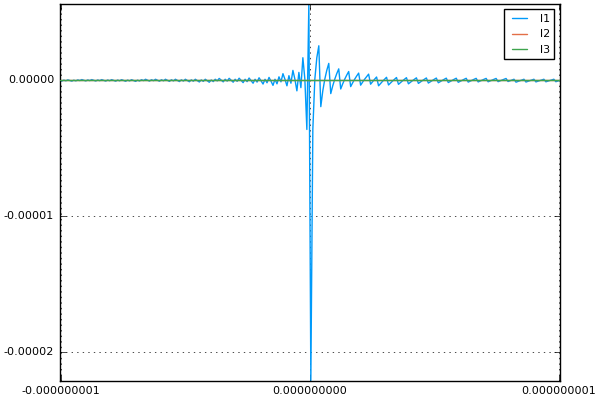

In [33]:
# Re-run this script with "Cell -> Run All" to see the plot

function f(x)
    z = Array(Float64,length(x))
    for i=1:length(x)
        z[i] = (exp(x[i])-1) / ((1 + x[i]) - 1) - 1
    end
    return z
end
s = 8e-3
x = 1e-9 * (-1-s/2 : s : 1+s/2)
# x = 1e-7 * (-1-s/2 : s : 1+s/2)
plot(x,(exp(x)-1) ./ x - 1, lab="l1")
plot!(x,f(x),lab="l2")
# Compiler makes unhelpful optimizations if we use (exp(x)-1) ./ ((1+x)-1) - 1
# plot!(x,(exp(x)-1) ./ ((1+x)-1) - 1,lab="z2b")
plot!(x,x/2 + x.^2/6 + x.^3/24,lab="l3")

In [27]:
@show set_bigfloat_precision(16)
ϵ = 2.0^(-15) + 2.0^(-16)
x0 = 1 + ϵ
x1 = 1

@printf "x0       %.30f\n" x0
@printf "x1       %.30f\n" x1

BF = BigFloat(x0) - BigFloat(x1)
@printf "x-y BF   %.30f\n" BF

fx = x0 - x1
@assert fx == ϵ
@printf "x-y 64   %.30f\n" fx

δf = Float64(BF) - fx
@assert 2.0^(-16) == δf
@printf "For Err  %e\n" δf / fx

δx = δf
@printf "x pertub %.30f\n" δx
x1t = x1 - δx

@printf "f        %.30f\n" x0 - x1t
@printf "B error  %e\n" abs(δx) / x1

set_bigfloat_precision(16) = 16
x0       1.000045776367187500000000000000
x1       1.000000000000000000000000000000
x-y BF   0.000061035156250000000000000000
x-y 64   0.000045776367187500000000000000
For Err  3.333333e-01
x pertub 0.000015258789062500000000000000
f        0.000061035156250000000000000000
B error  1.525879e-05


In [29]:
U = [1 1; 1 -1]; ϵ = 2.0^(-23)
A = 1/2 * U * diagm([1,ϵ]) * U.' # Has norm 1
b = [1; 1]; e = [2.0^(-23); 0]
@show A
@show x = A \ b
@show xe = A \ (b + e)
@show x - xe

A = [0.5000000596046448 0.4999999403953552
 0.4999999403953552 0.5000000596046448]
x = A \ b = [1.0,1.0]
xe = A \ (b + e) = [1.5000000596046377,0.5000000596046519]
x - xe = [-0.5000000596046377,0.4999999403953481]


2-element Array{Float64,1}:
 -0.5
  0.5